In [97]:
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings("ignore")

In [98]:
df=pd.read_csv("newdata.csv")

In [99]:
df.head()

,Difficulty,Workload,Due_Date
0,1,0,2
1,2,0,3
2,3,0,4
3,1,1,3
4,2,1,4


In [100]:
df.shape

(24, 3)

In [101]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Difficulty  24 non-null     int64
 1   Workload    24 non-null     int64
 2   Due_Date    24 non-null     int64
dtypes: int64(3)
memory usage: 704.0 bytes


In [102]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Difficulty,24.0,2.0,0.834058,1.0,1.00,2.0,3.00,3.0
Workload,24.0,3.5,2.340568,0.0,1.75,3.5,5.25,7.0
Due_Date,24.0,6.5,2.484736,2.0,4.75,6.5,8.25,11.0


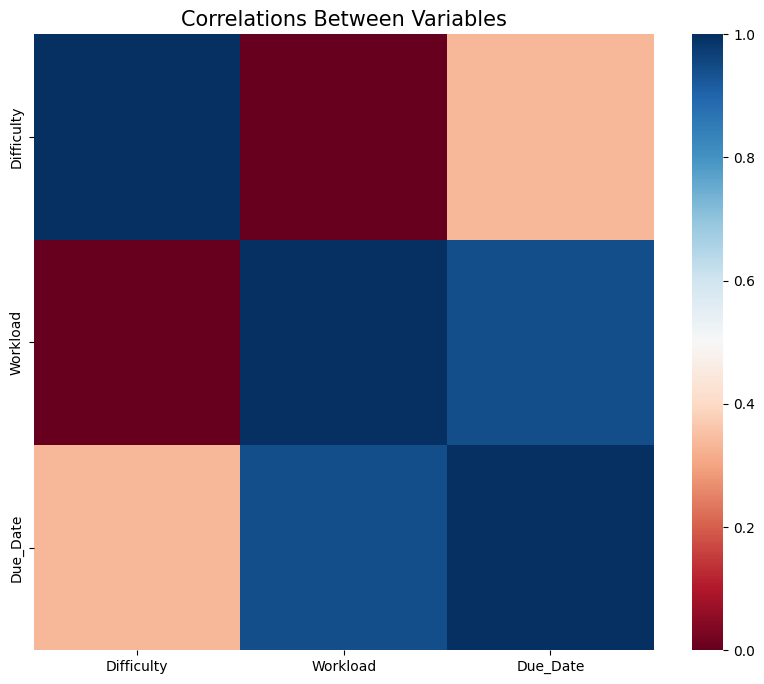

In [103]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

Text(0.5, 1.0, 'Price vs Square Feet')

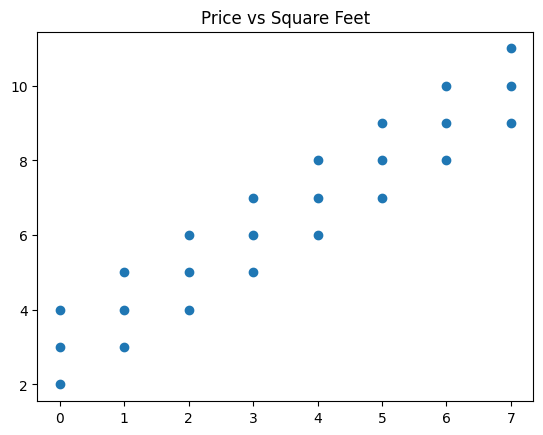

In [104]:
plt.scatter(df.Workload,df.Due_Date)
plt.title("Price vs Square Feet")

Text(0.5, 1.0, 'Price vs Square Feet')

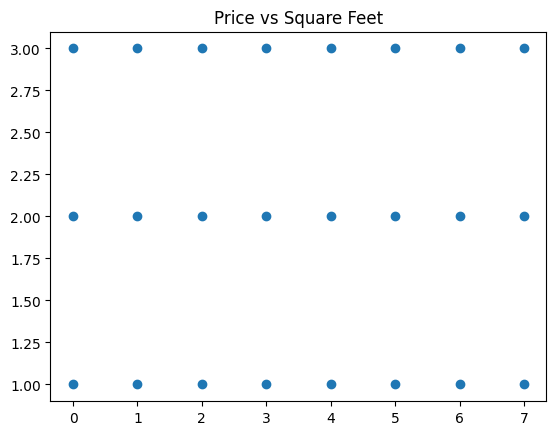

In [105]:
plt.scatter(df.Workload,df.Difficulty)
plt.title("Price vs Square Feet")

Text(0.5, 1.0, 'Price vs Square Feet')

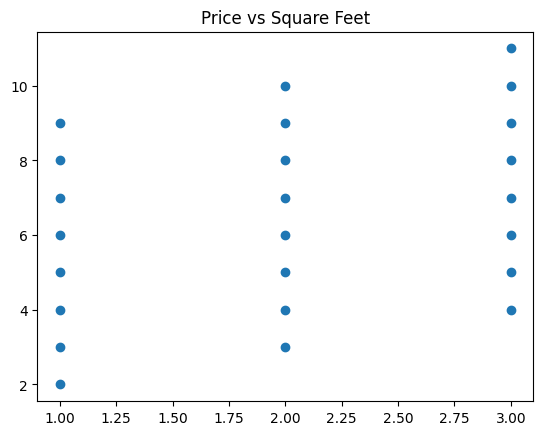

In [106]:
plt.scatter(df.Difficulty,df.Due_Date)
plt.title("Price vs Square Feet")

In [107]:
lab = df['Due_Date']

In [108]:
lab.head()

0    2
1    3
2    4
3    3
4    4
Name: Due_Date, dtype: int64

In [109]:
train_data = df.drop(['Due_Date'],axis=1)

In [110]:
train_data.head()

,Difficulty,Workload
0,1,0
1,2,0
2,3,0
3,1,1
4,2,1


In [111]:
x_train=train_data
y_train=lab

In [112]:
cf=LinearRegression()

In [113]:
cf.fit(x_train,y_train)

LinearRegression()

In [117]:
tdf=pd.read_csv("test.csv")

In [119]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Difficulty  4 non-null      int64
 1   Workload    4 non-null      int64
 2   Due_Date    4 non-null      int64
dtypes: int64(3)
memory usage: 224.0 bytes


In [122]:
y_test=tdf['Due_Date']
x_test=tdf.drop(['Due_Date'],axis=1)

In [114]:
pickle.dump(cf, open('model.pkl','wb'))

In [124]:
cf.score(x_test,y_test)

1.0

In [115]:
model = pickle.load(open('model.pkl','rb'))

In [116]:
model.predict([[2, 5]])

array([8.])